In [1]:
import pandas as pd
import sys
import datetime
import matplotlib.pylab as plt
import numpy as np
from math import log

In [2]:
START_DATE = datetime.date(2020,2,24)

In [3]:
def calculate_and_create_chart_for_province(start_date: datetime.date, province: str):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[df["denominazione_provincia"]==province]["totale_casi"])
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    cases_df_today = cases_df[cases_df["Day"]==datetime.date.today().strftime("%Y%m%d")]["Cases"].sum()
    print("Total cases per 1000 inhabitants up to today:", round(calculate_cases_to_inhabitants_ratio(cases_df_today, province),4))
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()

    plt.show()
    return

In [4]:
def calculate_and_create_chart_for_region(start_date: datetime.date, region: str):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[(df["denominazione_regione"]==region)&(df["denominazione_provincia"]!='In fase di definizione/aggiornamento')]["totale_casi"].sum())
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()
    plt.yscale("log")
    plt.show()
    return

In [5]:
def calculate_and_create_chart_for_Italy(start_date: datetime.date):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[df["denominazione_provincia"]!='In fase di definizione/aggiornamento']["totale_casi"].sum())
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()

    plt.show()
    return

In [6]:
def calculate_stats(cases_df):
    cases_df_today = cases_df[cases_df["Day"]==datetime.date.today().strftime("%Y%m%d")]["Cases"].sum()
    cases_df_yesterday = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 1)).strftime("%Y%m%d")]["Cases"].sum()
    cases_df_five_days_ago = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 5)).strftime("%Y%m%d")]["Cases"].sum()
    cases_df_six_days_ago = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 6)).strftime("%Y%m%d")]["Cases"].sum()
    print("Total cases up to today:", cases_df_today)
    print("New cases registered today:", cases_df_today-cases_df_yesterday)
    if int(cases_df_yesterday) != 0:
        print("New cases registered today in %:", round((cases_df_today-cases_df_yesterday)/cases_df_yesterday*100,2))

    print("Doubling time in the last five days:", round(calculate_doubling_time_in_the_last_five_days(cases_df_today, cases_df_five_days_ago), 1))
    print("Doubling time yesterday:", round(calculate_doubling_time_in_the_last_five_days(cases_df_yesterday, cases_df_six_days_ago), 1))
    print("Trend of new cases (in %) in the last 5 days:", round((cases_df_today-cases_df_five_days_ago)/cases_df_five_days_ago*100,2))
    
    return

In [7]:
def calculate_doubling_time_in_the_last_five_days(cases_df_today, cases_df_five_days_ago):
    if cases_df_five_days_ago ==0:
        return np.nan
    log_result = log(cases_df_today/cases_df_five_days_ago)
    if log_result != 0:
        return (5*log(2))/(log_result)
    else:
        return np.nan
    

In [8]:
def calculate_cases_to_inhabitants_ratio(cases: int, province: str) -> float:
    df_province: pd.DataFrame = pd.read_csv("../general/province.csv")
    inhabitants = df_province[df_province["Provincia"]==province]["Residenti"].str.replace('.', '', regex=True).sum()
    return int(cases)/int(inhabitants)*1000

# Casi di COVID-19 in Italia - COVID-19 cases in Italy

Total cases up to today: 77902
New cases registered today: 5798
New cases registered today in %: 8.04
Doubling time in the last five days: 8.6
Doubling time yesterday: 7.7
Trend of new cases (in %) in the last 5 days: 49.45


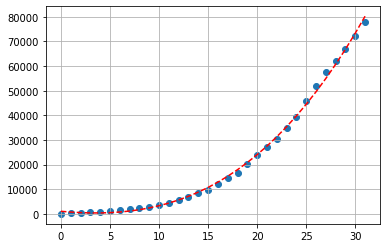

In [9]:
calculate_and_create_chart_for_Italy(START_DATE)

# Casi di COVID-19 in Abruzzo - COVID-19 cases in Abruzzo

Total cases up to today: 946
New cases registered today: 133
New cases registered today in %: 16.36
Doubling time in the last five days: 6.0
Doubling time yesterday: 5.8
Trend of new cases (in %) in the last 5 days: 78.83


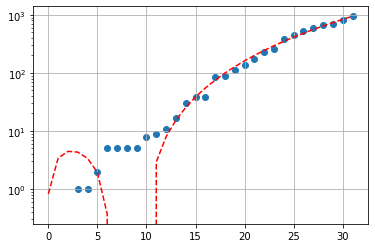

In [10]:
calculate_and_create_chart_for_region(START_DATE, 'Abruzzo')

## Chieti

Total cases per 1000 inhabitants up to today: 0.4497
Total cases up to today: 175
New cases registered today: 29
New cases registered today in %: 19.86
Doubling time in the last five days: 5.3
Doubling time yesterday: 5.8
Trend of new cases (in %) in the last 5 days: 92.31


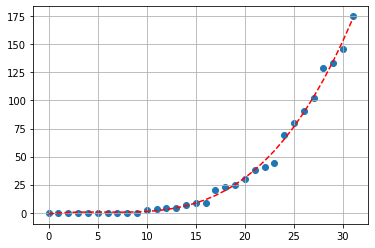

In [11]:
calculate_and_create_chart_for_province(START_DATE, 'Chieti')

## L'Aquila

Total cases per 1000 inhabitants up to today: 0.212
Total cases up to today: 64
New cases registered today: 4
New cases registered today in %: 6.67
Doubling time in the last five days: 4.8
Doubling time yesterday: 4.8
Trend of new cases (in %) in the last 5 days: 106.45


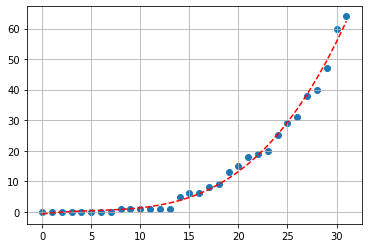

In [12]:
calculate_and_create_chart_for_province(START_DATE, "L'Aquila")

## Pescara

Total cases per 1000 inhabitants up to today: 1.385
Total cases up to today: 445
New cases registered today: 33
New cases registered today in %: 8.01
Doubling time in the last five days: 8.9
Doubling time yesterday: 7.5
Trend of new cases (in %) in the last 5 days: 47.35


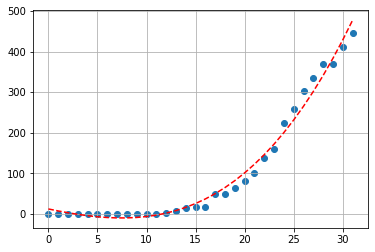

In [13]:
calculate_and_create_chart_for_province(START_DATE, 'Pescara')

## Teramo

Total cases per 1000 inhabitants up to today: 0.8455
Total cases up to today: 262
New cases registered today: 67
New cases registered today in %: 34.36
Doubling time in the last five days: 3.8
Doubling time yesterday: 3.9
Trend of new cases (in %) in the last 5 days: 149.52


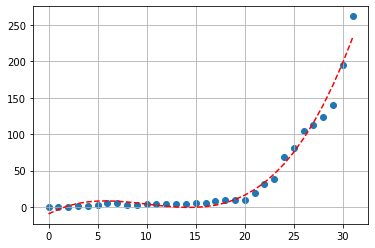

In [14]:
calculate_and_create_chart_for_province(START_DATE, 'Teramo')

# Casi di COVID-19 in Basilicata - COVID-19 cases in Basilicata

Total cases up to today: 134
New cases registered today: 28
New cases registered today in %: 26.42
Doubling time in the last five days: 4.9
Doubling time yesterday: 4.9
Trend of new cases (in %) in the last 5 days: 103.03


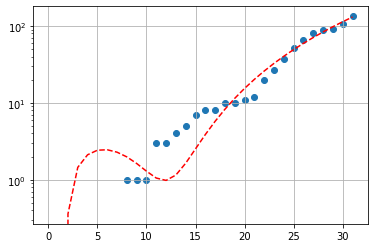

In [15]:
calculate_and_create_chart_for_region(START_DATE, 'Basilicata')

## Matera

Total cases per 1000 inhabitants up to today: 0.2404
Total cases up to today: 48
New cases registered today: 12
New cases registered today in %: 33.33
Doubling time in the last five days: 1.9
Doubling time yesterday: 2.5
Trend of new cases (in %) in the last 5 days: 500.0


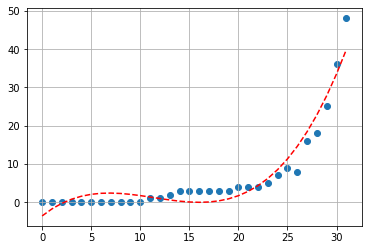

In [16]:
calculate_and_create_chart_for_province(START_DATE, 'Matera')

## Potenza

Total cases per 1000 inhabitants up to today: 0.232
Total cases up to today: 86
New cases registered today: 16
New cases registered today in %: 22.86
Doubling time in the last five days: 8.8
Doubling time yesterday: 7.1
Trend of new cases (in %) in the last 5 days: 48.28


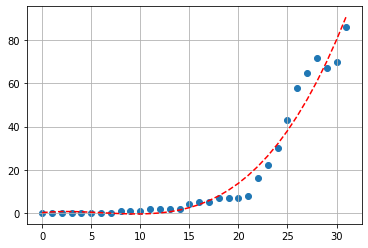

In [17]:
calculate_and_create_chart_for_province(START_DATE, 'Potenza')

# Casi di COVID-19 nella Provincia Autonoma di Bolzano - COVID-19 cases in Autonomous Province of Bolzano

Total cases up to today: 906
New cases registered today: 48
New cases registered today in %: 5.59
Doubling time in the last five days: 9.2
Doubling time yesterday: 7.7
Trend of new cases (in %) in the last 5 days: 45.89


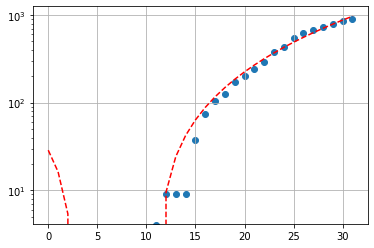

In [18]:
calculate_and_create_chart_for_region(START_DATE, 'P.A. Bolzano')

# Casi di COVID-19 in Calabria - COVID-19 cases in Calabria

Total cases up to today: 391
New cases registered today: 42
New cases registered today in %: 12.03
Doubling time in the last five days: 6.7
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 67.81


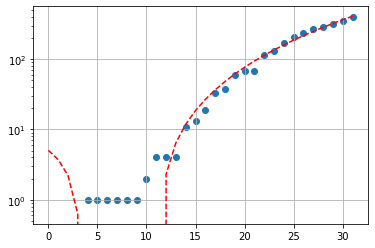

In [19]:
calculate_and_create_chart_for_region(START_DATE, 'Calabria')

## Catanzaro

Total cases per 1000 inhabitants up to today: 0.1463
Total cases up to today: 53
New cases registered today: 2
New cases registered today in %: 3.92
Doubling time in the last five days: 10.4
Doubling time yesterday: 8.5
Trend of new cases (in %) in the last 5 days: 39.47


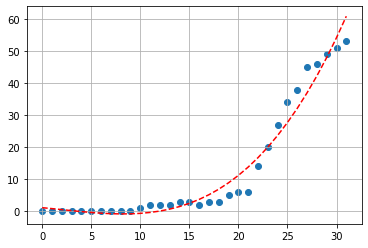

In [20]:
calculate_and_create_chart_for_province(START_DATE, 'Catanzaro')

## Cosenza

Total cases per 1000 inhabitants up to today: 0.1503
Total cases up to today: 107
New cases registered today: 8
New cases registered today in %: 8.08
Doubling time in the last five days: 4.6
Doubling time yesterday: 4.4
Trend of new cases (in %) in the last 5 days: 114.0


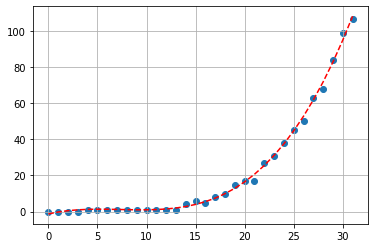

In [21]:
calculate_and_create_chart_for_province(START_DATE, 'Cosenza')

## Crotone

Total cases per 1000 inhabitants up to today: 0.4557
Total cases up to today: 80
New cases registered today: 9
New cases registered today in %: 12.68
Doubling time in the last five days: 7.4
Doubling time yesterday: 7.6
Trend of new cases (in %) in the last 5 days: 60.0


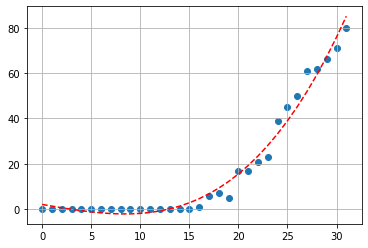

In [22]:
calculate_and_create_chart_for_province(START_DATE, 'Crotone')

## Reggio di Calabria

Total cases per 1000 inhabitants up to today: 0.2221
Total cases up to today: 123
New cases registered today: 18
New cases registered today in %: 17.14
Doubling time in the last five days: 9.1
Doubling time yesterday: 9.5
Trend of new cases (in %) in the last 5 days: 46.43


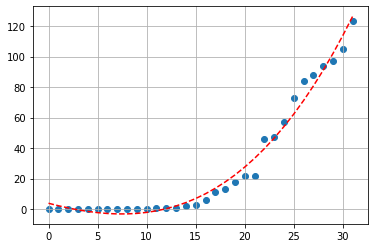

In [23]:
calculate_and_create_chart_for_province(START_DATE, 'Reggio di Calabria')

## Vibo Valentia

Total cases per 1000 inhabitants up to today: 0.1732
Total cases up to today: 28
New cases registered today: 5
New cases registered today in %: 21.74
Doubling time in the last five days: 3.7
Doubling time yesterday: 3.3
Trend of new cases (in %) in the last 5 days: 154.55


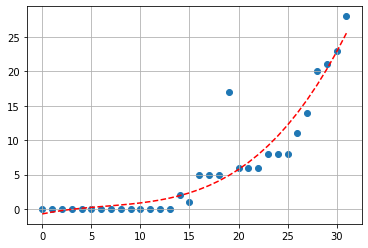

In [24]:
calculate_and_create_chart_for_province(START_DATE, 'Vibo Valentia')

# Casi di COVID-19 in Campania - COVID-19 cases in Campania

Total cases up to today: 1280
New cases registered today: 83
New cases registered today in %: 6.93
Doubling time in the last five days: 8.0
Doubling time yesterday: 7.0
Trend of new cases (in %) in the last 5 days: 54.22


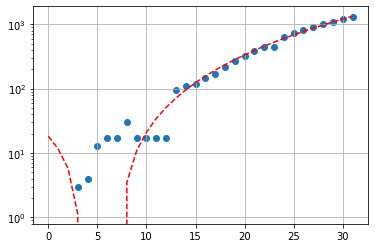

In [25]:
calculate_and_create_chart_for_region(START_DATE, 'Campania')

## Avellino

Total cases per 1000 inhabitants up to today: 0.425
Total cases up to today: 180
New cases registered today: 8
New cases registered today in %: 4.65
Doubling time in the last five days: 9.3
Doubling time yesterday: 6.1
Trend of new cases (in %) in the last 5 days: 45.16


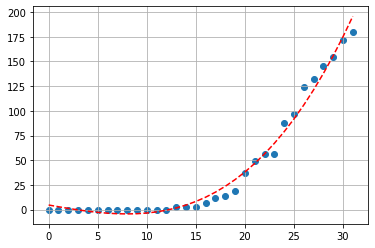

In [26]:
calculate_and_create_chart_for_province(START_DATE, 'Avellino')

## Benevento

Total cases per 1000 inhabitants up to today: 0.0501
Total cases up to today: 14
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 14.4
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 27.27


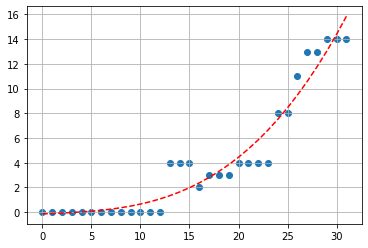

In [27]:
calculate_and_create_chart_for_province(START_DATE, 'Benevento')

## Caserta

Total cases per 1000 inhabitants up to today: 0.1915
Total cases up to today: 177
New cases registered today: 12
New cases registered today in %: 7.27
Doubling time in the last five days: 6.8
Doubling time yesterday: 6.4
Trend of new cases (in %) in the last 5 days: 66.98


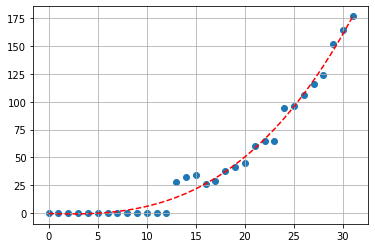

In [28]:
calculate_and_create_chart_for_province(START_DATE, 'Caserta')

## Napoli

Total cases per 1000 inhabitants up to today: 0.214
Total cases up to today: 665
New cases registered today: 39
New cases registered today in %: 6.23
Doubling time in the last five days: 9.6
Doubling time yesterday: 8.5
Trend of new cases (in %) in the last 5 days: 43.63


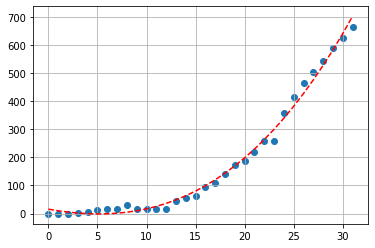

In [29]:
calculate_and_create_chart_for_province(START_DATE, 'Napoli')

## Salerno

Total cases per 1000 inhabitants up to today: 0.2209
Total cases up to today: 244
New cases registered today: 24
New cases registered today in %: 10.91
Doubling time in the last five days: 5.2
Doubling time yesterday: 5.3
Trend of new cases (in %) in the last 5 days: 93.65


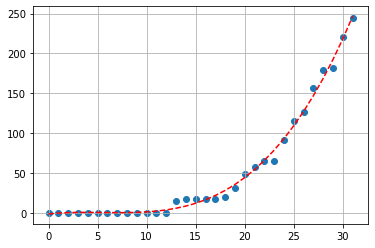

In [30]:
calculate_and_create_chart_for_province(START_DATE, 'Salerno')

# Casi di COVID-19 in Emilia Romagna - COVID-19 cases in Emilia Romagna

Total cases up to today: 10816
New cases registered today: 762
New cases registered today in %: 7.58
Doubling time in the last five days: 7.2
Doubling time yesterday: 6.6
Trend of new cases (in %) in the last 5 days: 61.31


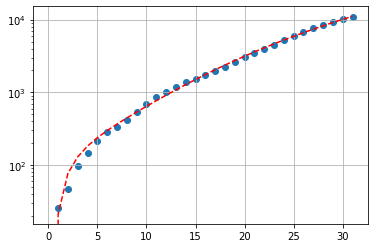

In [31]:
calculate_and_create_chart_for_region(START_DATE, 'Emilia Romagna')

## Bologna

Total cases per 1000 inhabitants up to today: 1.2416
Total cases up to today: 1253
New cases registered today: 146
New cases registered today in %: 13.19
Doubling time in the last five days: 4.8
Doubling time yesterday: 5.0
Trend of new cases (in %) in the last 5 days: 105.41


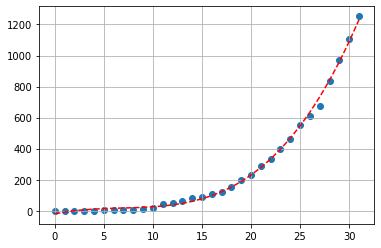

In [32]:
calculate_and_create_chart_for_province(START_DATE, 'Bologna')

## Ferrara

Total cases per 1000 inhabitants up to today: 0.6086
Total cases up to today: 212
New cases registered today: 8
New cases registered today in %: 3.92
Doubling time in the last five days: 6.4
Doubling time yesterday: 5.0
Trend of new cases (in %) in the last 5 days: 72.36


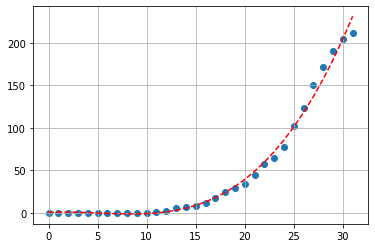

In [33]:
calculate_and_create_chart_for_province(START_DATE, 'Ferrara')

## Forlì-Cesena

In [35]:
calculate_and_create_chart_for_province(START_DATE, 'Forlì-Cesena')

TypeError: cannot convert the series to <class 'int'>

## Modena

In [ ]:
calculate_and_create_chart_for_province(START_DATE, 'Modena')

## Parma

In [ ]:
calculate_and_create_chart_for_province(START_DATE, 'Parma')

## Piacenza

In [ ]:
calculate_and_create_chart_for_province(START_DATE, 'Piacenza')

## Ravenna

In [ ]:
calculate_and_create_chart_for_province(START_DATE, 'Ravenna')

## Reggio nell'Emilia

Total cases per 1000 inhabitants up to today: 3.1888
Total cases up to today: 1698
New cases registered today: 112
New cases registered today in %: 7.06
Doubling time in the last five days: 6.3
Doubling time yesterday: 4.8
Trend of new cases (in %) in the last 5 days: 73.8


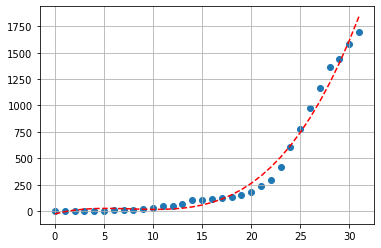

In [36]:
calculate_and_create_chart_for_province(START_DATE, "Reggio nell'Emilia")

## Rimini

Total cases per 1000 inhabitants up to today: 3.5304
Total cases up to today: 1189
New cases registered today: 53
New cases registered today in %: 4.67
Doubling time in the last five days: 9.5
Doubling time yesterday: 8.5
Trend of new cases (in %) in the last 5 days: 43.95


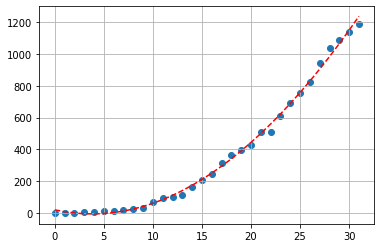

In [37]:
calculate_and_create_chart_for_province(START_DATE, 'Rimini')

# Casi di COVID-19 in Friuli Venezia Giulia - COVID-19 cases in Friuli Venezia Giulia

Total cases up to today: 1215
New cases registered today: 87
New cases registered today in %: 7.71
Doubling time in the last five days: 8.1
Doubling time yesterday: 6.4
Trend of new cases (in %) in the last 5 days: 53.8


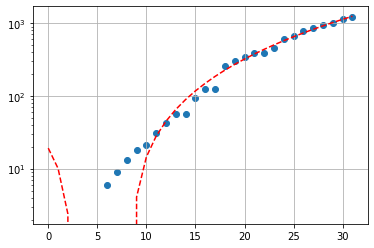

In [38]:
calculate_and_create_chart_for_region(START_DATE, 'Friuli Venezia Giulia')

## Gorizia

Total cases per 1000 inhabitants up to today: 0.537
Total cases up to today: 75
New cases registered today: 10
New cases registered today in %: 15.38
Doubling time in the last five days: 5.1
Doubling time yesterday: 4.5
Trend of new cases (in %) in the last 5 days: 97.37


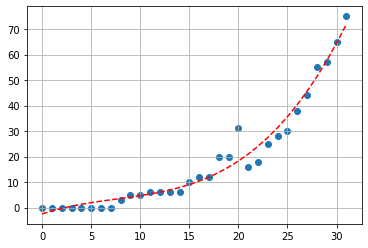

In [39]:
calculate_and_create_chart_for_province(START_DATE, 'Gorizia')

## Pordenone

Total cases per 1000 inhabitants up to today: 0.9454
Total cases up to today: 295
New cases registered today: 18
New cases registered today in %: 6.5
Doubling time in the last five days: 4.8
Doubling time yesterday: 3.9
Trend of new cases (in %) in the last 5 days: 104.86


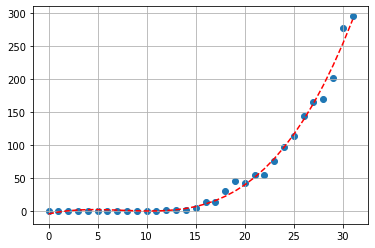

In [40]:
calculate_and_create_chart_for_province(START_DATE, 'Pordenone')

## Trieste

Total cases per 1000 inhabitants up to today: 1.6405
Total cases up to today: 385
New cases registered today: 30
New cases registered today in %: 8.45
Doubling time in the last five days: 9.8
Doubling time yesterday: 7.0
Trend of new cases (in %) in the last 5 days: 42.59


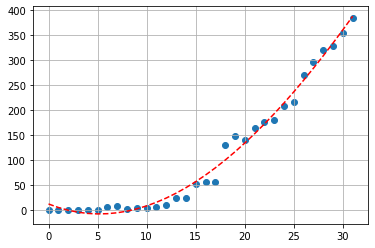

In [41]:
calculate_and_create_chart_for_province(START_DATE, 'Trieste')

## Udine

Total cases per 1000 inhabitants up to today: 0.8655
Total cases up to today: 460
New cases registered today: 29
New cases registered today in %: 6.73
Doubling time in the last five days: 11.2
Doubling time yesterday: 9.2
Trend of new cases (in %) in the last 5 days: 36.09


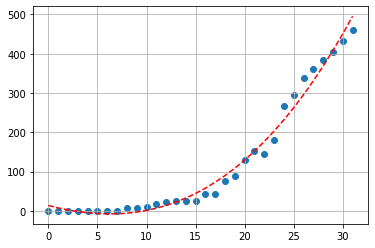

In [42]:
calculate_and_create_chart_for_province(START_DATE, 'Udine')

# Casi di COVID-19 nel Lazio - COVID-19 cases in Lazio

Total cases up to today: 2092
New cases registered today: 199
New cases registered today in %: 10.51
Doubling time in the last five days: 6.1
Doubling time yesterday: 5.5
Trend of new cases (in %) in the last 5 days: 76.69


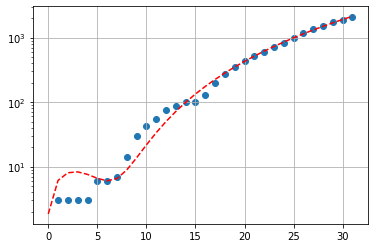

In [43]:
calculate_and_create_chart_for_region(START_DATE, 'Lazio')

## Frosinone

Total cases per 1000 inhabitants up to today: 0.3164
Total cases up to today: 156
New cases registered today: 50
New cases registered today in %: 47.17
Doubling time in the last five days: 3.6
Doubling time yesterday: 4.9
Trend of new cases (in %) in the last 5 days: 164.41


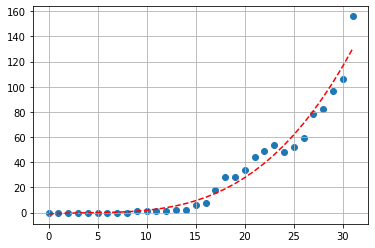

In [44]:
calculate_and_create_chart_for_province(START_DATE, 'Frosinone')

## Latina

Total cases per 1000 inhabitants up to today: 0.3583
Total cases up to today: 206
New cases registered today: 8
New cases registered today in %: 4.04
Doubling time in the last five days: 8.3
Doubling time yesterday: 6.4
Trend of new cases (in %) in the last 5 days: 51.47


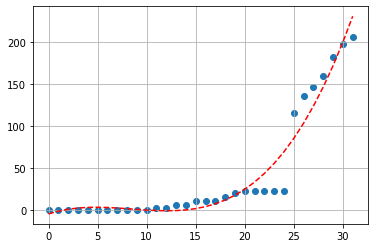

In [45]:
calculate_and_create_chart_for_province(START_DATE, 'Latina')

## Rieti

Total cases per 1000 inhabitants up to today: 0.2604
Total cases up to today: 41
New cases registered today: 2
New cases registered today in %: 5.13
Doubling time in the last five days: 6.5
Doubling time yesterday: 4.5
Trend of new cases (in %) in the last 5 days: 70.83


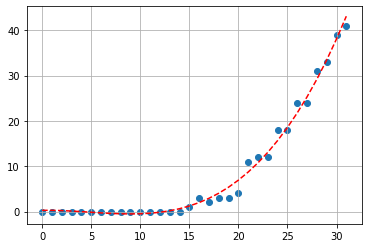

In [46]:
calculate_and_create_chart_for_province(START_DATE, 'Rieti')

## Roma

Total cases per 1000 inhabitants up to today: 0.3599
Total cases up to today: 1567
New cases registered today: 139
New cases registered today in %: 9.73
Doubling time in the last five days: 6.2
Doubling time yesterday: 5.4
Trend of new cases (in %) in the last 5 days: 75.48


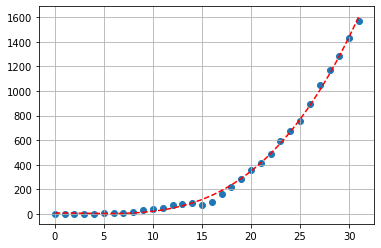

In [47]:
calculate_and_create_chart_for_province(START_DATE, 'Roma')

## Viterbo

Total cases per 1000 inhabitants up to today: 0.3824
Total cases up to today: 122
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 6.6
Doubling time yesterday: 5.2
Trend of new cases (in %) in the last 5 days: 69.44


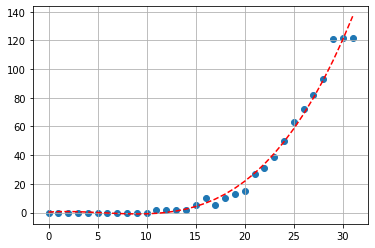

In [48]:
calculate_and_create_chart_for_province(START_DATE, 'Viterbo')

# Casi di COVID-19 in Liguria - COVID-19 cases in Liguria

Total cases up to today: 1331
New cases registered today: 25
New cases registered today in %: 1.91
Doubling time in the last five days: 11.4
Doubling time yesterday: 10.0
Trend of new cases (in %) in the last 5 days: 35.4


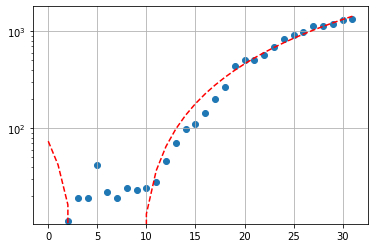

In [49]:
calculate_and_create_chart_for_region(START_DATE, 'Liguria')

## Genova

Total cases per 1000 inhabitants up to today: 0.8964
Total cases up to today: 762
New cases registered today: -20
New cases registered today in %: -2.56
Doubling time in the last five days: 11.3
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 35.83


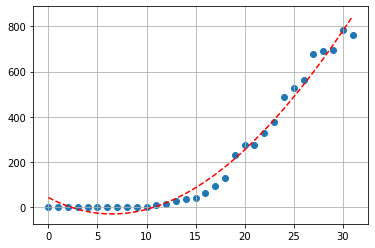

In [50]:
calculate_and_create_chart_for_province(START_DATE, 'Genova')

## Imperia

Total cases per 1000 inhabitants up to today: 0.9808
Total cases up to today: 211
New cases registered today: 34
New cases registered today in %: 19.21
Doubling time in the last five days: 11.2
Doubling time yesterday: 17.4
Trend of new cases (in %) in the last 5 days: 36.13


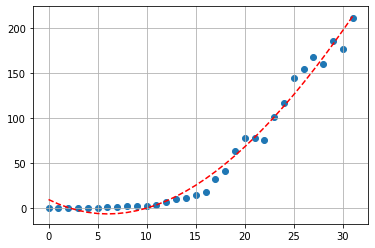

In [51]:
calculate_and_create_chart_for_province(START_DATE, 'Imperia')

## La Spezia

Total cases per 1000 inhabitants up to today: 0.6751
Total cases up to today: 149
New cases registered today: 12
New cases registered today in %: 8.76
Doubling time in the last five days: 7.5
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 58.51


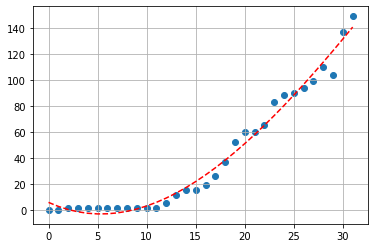

In [52]:
calculate_and_create_chart_for_province(START_DATE, 'La Spezia')

## Savona

Total cases per 1000 inhabitants up to today: 0.748
Total cases up to today: 209
New cases registered today: -1
New cases registered today in %: -0.48
Doubling time in the last five days: 18.3
Doubling time yesterday: 13.4
Trend of new cases (in %) in the last 5 days: 20.81


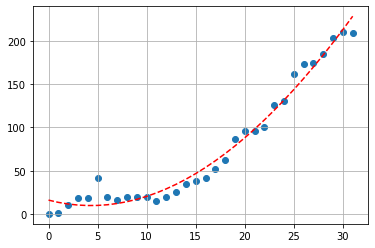

In [53]:
calculate_and_create_chart_for_province(START_DATE, 'Savona')

# Casi di COVID-19 in Lombardia - COVID-19 cases in Lombardy

Total cases up to today: 34082
New cases registered today: 2424
New cases registered today in %: 7.66
Doubling time in the last five days: 11.1
Doubling time yesterday: 9.3
Trend of new cases (in %) in the last 5 days: 36.75


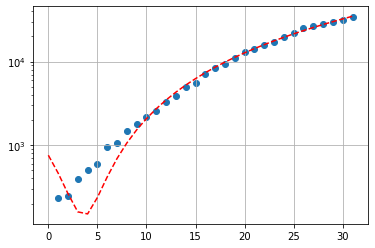

In [54]:
calculate_and_create_chart_for_region(START_DATE, 'Lombardia')

## Bergamo

Total cases per 1000 inhabitants up to today: 6.7193
Total cases up to today: 7458
New cases registered today: 386
New cases registered today in %: 5.46
Doubling time in the last five days: 14.5
Doubling time yesterday: 11.0
Trend of new cases (in %) in the last 5 days: 27.07


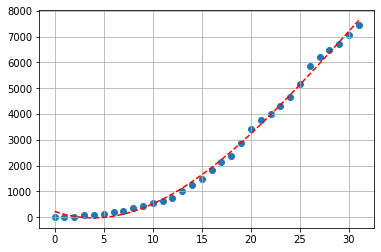

In [55]:
calculate_and_create_chart_for_province(START_DATE, 'Bergamo')

## Brescia

Total cases per 1000 inhabitants up to today: 5.4907
Total cases up to today: 6931
New cases registered today: 334
New cases registered today in %: 5.06
Doubling time in the last five days: 10.8
Doubling time yesterday: 9.9
Trend of new cases (in %) in the last 5 days: 37.85


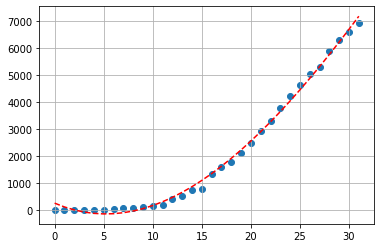

In [56]:
calculate_and_create_chart_for_province(START_DATE, 'Brescia')

## Como

Total cases per 1000 inhabitants up to today: 1.2696
Total cases up to today: 762
New cases registered today: 56
New cases registered today in %: 7.93
Doubling time in the last five days: 6.6
Doubling time yesterday: 5.6
Trend of new cases (in %) in the last 5 days: 68.58


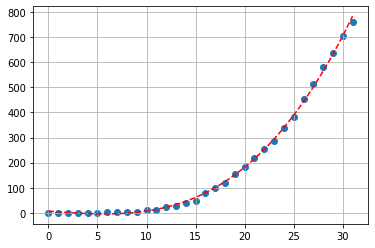

In [57]:
calculate_and_create_chart_for_province(START_DATE, 'Como')

## Cremona

Total cases per 1000 inhabitants up to today: 9.3771
Total cases up to today: 3370
New cases registered today: 214
New cases registered today in %: 6.78
Doubling time in the last five days: 16.5
Doubling time yesterday: 12.5
Trend of new cases (in %) in the last 5 days: 23.31


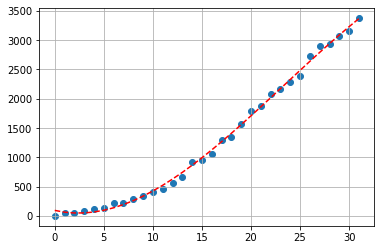

In [58]:
calculate_and_create_chart_for_province(START_DATE, 'Cremona')

## Lecco

Total cases per 1000 inhabitants up to today: 3.4165
Total cases up to today: 1159
New cases registered today: 83
New cases registered today in %: 7.71
Doubling time in the last five days: 9.9
Doubling time yesterday: 7.5
Trend of new cases (in %) in the last 5 days: 41.69


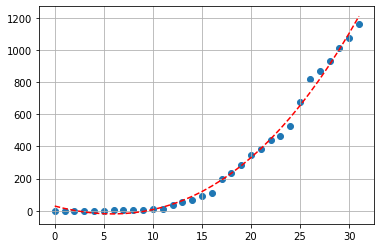

In [59]:
calculate_and_create_chart_for_province(START_DATE, 'Lecco')

## Lodi

Total cases per 1000 inhabitants up to today: 8.5812
Total cases up to today: 1968
New cases registered today: 84
New cases registered today in %: 4.46
Doubling time in the last five days: 23.0
Doubling time yesterday: 21.0
Trend of new cases (in %) in the last 5 days: 16.24


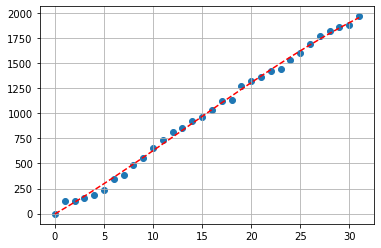

In [60]:
calculate_and_create_chart_for_province(START_DATE, 'Lodi')

## Mantova

Total cases per 1000 inhabitants up to today: 3.0295
Total cases up to today: 1250
New cases registered today: 74
New cases registered today in %: 6.29
Doubling time in the last five days: 8.8
Doubling time yesterday: 7.1
Trend of new cases (in %) in the last 5 days: 48.46


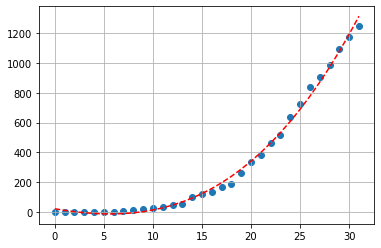

In [61]:
calculate_and_create_chart_for_province(START_DATE, 'Mantova')

## Milano

Total cases per 1000 inhabitants up to today: 2.1509
Total cases up to today: 6922
New cases registered today: 848
New cases registered today in %: 13.96
Doubling time in the last five days: 8.8
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 48.16


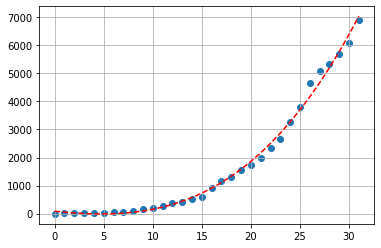

In [62]:
calculate_and_create_chart_for_province(START_DATE, 'Milano')

## Monza e della Brianza

Total cases per 1000 inhabitants up to today: 2.0141
Total cases up to today: 1750
New cases registered today: 163
New cases registered today in %: 10.27
Doubling time in the last five days: 7.2
Doubling time yesterday: 5.2
Trend of new cases (in %) in the last 5 days: 61.44


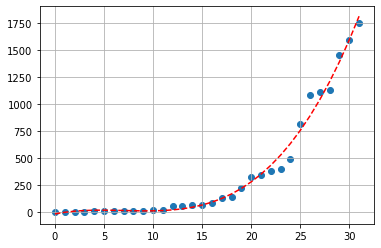

In [63]:
calculate_and_create_chart_for_province(START_DATE, 'Monza e della Brianza')

## Pavia

Total cases per 1000 inhabitants up to today: 3.079
Total cases up to today: 1685
New cases registered today: 107
New cases registered today in %: 6.78
Doubling time in the last five days: 10.1
Doubling time yesterday: 9.7
Trend of new cases (in %) in the last 5 days: 41.12


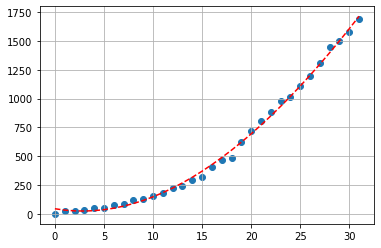

In [64]:
calculate_and_create_chart_for_province(START_DATE, 'Pavia')

## Sondrio

Total cases per 1000 inhabitants up to today: 1.7913
Total cases up to today: 325
New cases registered today: 41
New cases registered today in %: 14.44
Doubling time in the last five days: 5.8
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 81.56


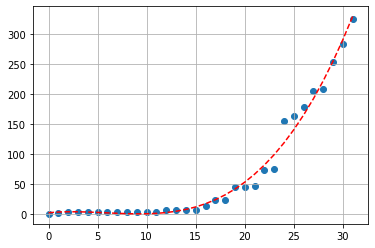

In [65]:
calculate_and_create_chart_for_province(START_DATE, 'Sondrio')

## Varese

Total cases per 1000 inhabitants up to today: 0.564
Total cases up to today: 502
New cases registered today: 34
New cases registered today in %: 7.26
Doubling time in the last five days: 10.3
Doubling time yesterday: 10.6
Trend of new cases (in %) in the last 5 days: 39.83


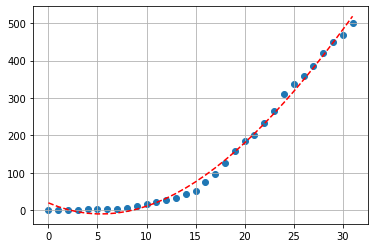

In [66]:
calculate_and_create_chart_for_province(START_DATE, 'Varese')

# Casi di COVID-19 nelle Marche - COVID-19 cases in Marche

Total cases up to today: 3063
New cases registered today: 176
New cases registered today in %: 6.1
Doubling time in the last five days: 9.4
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 44.48


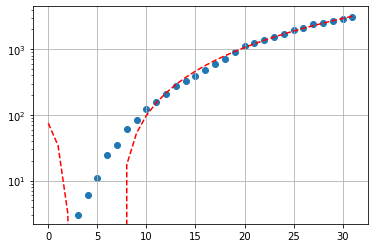

In [67]:
calculate_and_create_chart_for_region(START_DATE, 'Marche')

## Ancona

Total cases per 1000 inhabitants up to today: 1.8329
Total cases up to today: 869
New cases registered today: 49
New cases registered today in %: 5.98
Doubling time in the last five days: 8.0
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 54.08


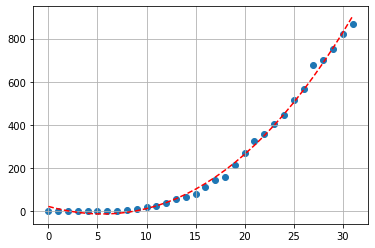

In [68]:
calculate_and_create_chart_for_province(START_DATE, 'Ancona')

## Ascoli Piceno

Total cases per 1000 inhabitants up to today: 0.53
Total cases up to today: 111
New cases registered today: 31
New cases registered today in %: 38.75
Doubling time in the last five days: 4.3
Doubling time yesterday: 5.6
Trend of new cases (in %) in the last 5 days: 122.0


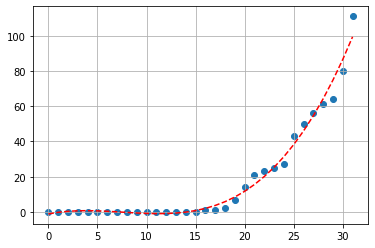

In [69]:
calculate_and_create_chart_for_province(START_DATE, 'Ascoli Piceno')

## Fermo

Total cases per 1000 inhabitants up to today: 1.1667
Total cases up to today: 204
New cases registered today: 44
New cases registered today in %: 27.5
Doubling time in the last five days: 3.8
Doubling time yesterday: 5.0
Trend of new cases (in %) in the last 5 days: 148.78


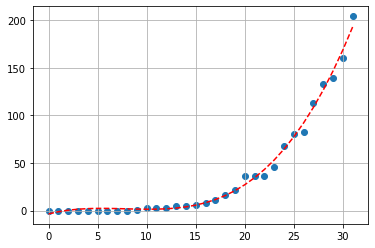

In [70]:
calculate_and_create_chart_for_province(START_DATE, 'Fermo')

## Macerata

Total cases per 1000 inhabitants up to today: 1.2699
Total cases up to today: 405
New cases registered today: 10
New cases registered today in %: 2.53
Doubling time in the last five days: 6.5
Doubling time yesterday: 5.7
Trend of new cases (in %) in the last 5 days: 70.17


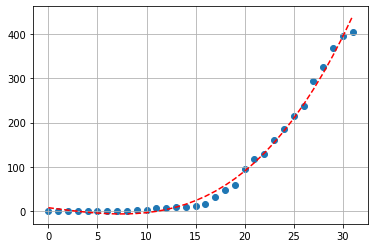

In [71]:
calculate_and_create_chart_for_province(START_DATE, 'Macerata')

## Pesaro e Urbino

Total cases per 1000 inhabitants up to today: 4.0864
Total cases up to today: 1474
New cases registered today: 42
New cases registered today in %: 2.93
Doubling time in the last five days: 15.9
Doubling time yesterday: 13.1
Trend of new cases (in %) in the last 5 days: 24.28


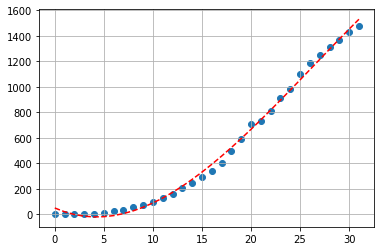

In [72]:
calculate_and_create_chart_for_province(START_DATE, 'Pesaro e Urbino')

# Casi di COVID-19 in Molise - COVID-19 cases in Molise¶

Total cases up to today: 94
New cases registered today: 30
New cases registered today in %: 46.88
Doubling time in the last five days: 6.0
Doubling time yesterday: 8.7
Trend of new cases (in %) in the last 5 days: 77.36


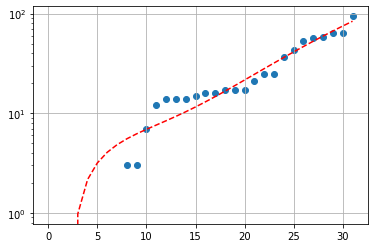

In [73]:
calculate_and_create_chart_for_region(START_DATE, 'Molise')

## Campobasso

Total cases per 1000 inhabitants up to today: 0.3784
Total cases up to today: 85
New cases registered today: 25
New cases registered today in %: 41.67
Doubling time in the last five days: 6.3
Doubling time yesterday: 8.0
Trend of new cases (in %) in the last 5 days: 73.47


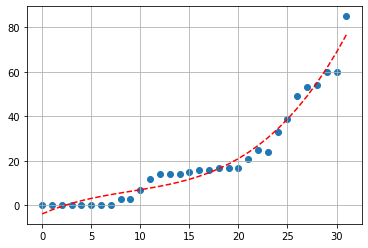

In [74]:
calculate_and_create_chart_for_province(START_DATE, 'Campobasso')

## Isernia

Total cases per 1000 inhabitants up to today: 0.1049
Total cases up to today: 9
New cases registered today: 5
New cases registered today in %: 125.0
Doubling time in the last five days: 4.3
Doubling time yesterday: nan
Trend of new cases (in %) in the last 5 days: 125.0


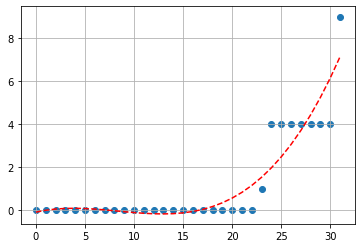

In [75]:
calculate_and_create_chart_for_province(START_DATE, 'Isernia')

# Casi di COVID-19 in Piemonte - COVID-19 cases in Piedmont 

Total cases up to today: 6361
New cases registered today: 501
New cases registered today in %: 8.55
Doubling time in the last five days: 6.2
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 74.94


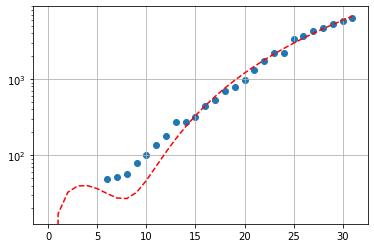

In [76]:
calculate_and_create_chart_for_region(START_DATE, 'Piemonte')

## Alessandria

Total cases per 1000 inhabitants up to today: 2.2969
Total cases up to today: 980
New cases registered today: 34
New cases registered today in %: 3.59
Doubling time in the last five days: 8.6
Doubling time yesterday: 7.5
Trend of new cases (in %) in the last 5 days: 49.85


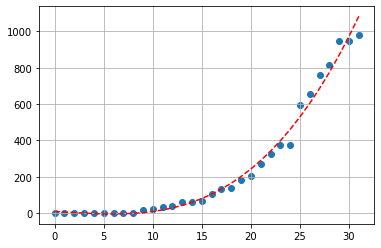

In [77]:
calculate_and_create_chart_for_province(START_DATE, 'Alessandria')

## Asti

Total cases per 1000 inhabitants up to today: 1.3015
Total cases up to today: 282
New cases registered today: 21
New cases registered today in %: 8.05
Doubling time in the last five days: 6.5
Doubling time yesterday: 6.3
Trend of new cases (in %) in the last 5 days: 69.88


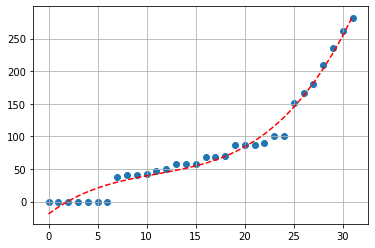

In [78]:
calculate_and_create_chart_for_province(START_DATE, 'Asti')

## Biella

Total cases per 1000 inhabitants up to today: 1.8818
Total cases up to today: 336
New cases registered today: 9
New cases registered today in %: 2.75
Doubling time in the last five days: 5.7
Doubling time yesterday: 5.5
Trend of new cases (in %) in the last 5 days: 84.62


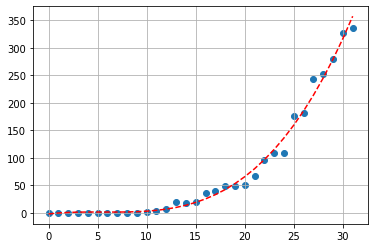

In [79]:
calculate_and_create_chart_for_province(START_DATE, 'Biella')

## Cuneo

Total cases per 1000 inhabitants up to today: 0.8267
Total cases up to today: 487
New cases registered today: 46
New cases registered today in %: 10.43
Doubling time in the last five days: 5.7
Doubling time yesterday: 5.0
Trend of new cases (in %) in the last 5 days: 83.77


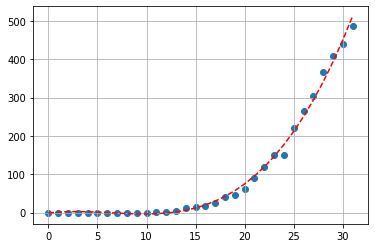

In [80]:
calculate_and_create_chart_for_province(START_DATE, 'Cuneo')

## Novara

Total cases per 1000 inhabitants up to today: 1.5589
Total cases up to today: 577
New cases registered today: 60
New cases registered today in %: 11.61
Doubling time in the last five days: 6.2
Doubling time yesterday: 6.1
Trend of new cases (in %) in the last 5 days: 74.85


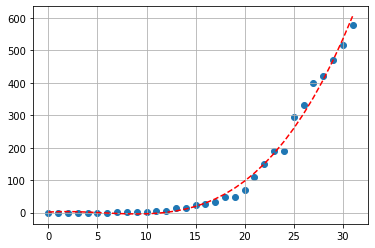

In [81]:
calculate_and_create_chart_for_province(START_DATE, 'Novara')

## Torino

Total cases per 1000 inhabitants up to today: 1.3644
Total cases up to today: 3108
New cases registered today: 295
New cases registered today in %: 10.49
Doubling time in the last five days: 5.6
Doubling time yesterday: 5.9
Trend of new cases (in %) in the last 5 days: 85.0


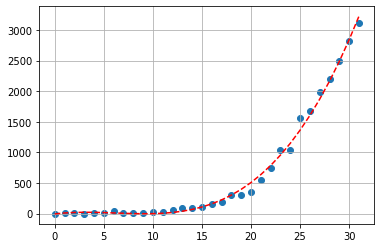

In [82]:
calculate_and_create_chart_for_province(START_DATE, 'Torino')

## 	Verbano-Cusio-Ossola

Total cases per 1000 inhabitants up to today: 1.5971
Total cases up to today: 255
New cases registered today: 8
New cases registered today in %: 3.24
Doubling time in the last five days: 6.5
Doubling time yesterday: 6.3
Trend of new cases (in %) in the last 5 days: 71.14


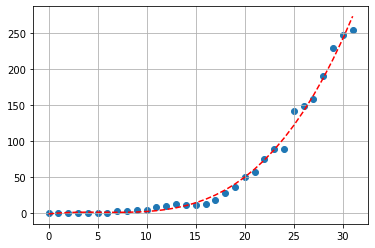

In [83]:
calculate_and_create_chart_for_province(START_DATE, 'Verbano-Cusio-Ossola')

## Vercelli

Total cases per 1000 inhabitants up to today: 1.9325
Total cases up to today: 336
New cases registered today: 28
New cases registered today in %: 9.09
Doubling time in the last five days: 7.4
Doubling time yesterday: 8.3
Trend of new cases (in %) in the last 5 days: 60.0


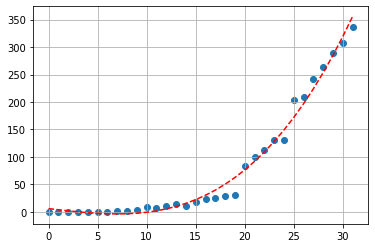

In [84]:
calculate_and_create_chart_for_province(START_DATE, 'Vercelli')

# Casi di COVID-19 in Puglia - COVID-19 cases in Apulia

Total cases up to today: 1150
New cases registered today: 136
New cases registered today in %: 13.41
Doubling time in the last five days: 6.0
Doubling time yesterday: 5.9
Trend of new cases (in %) in the last 5 days: 77.47


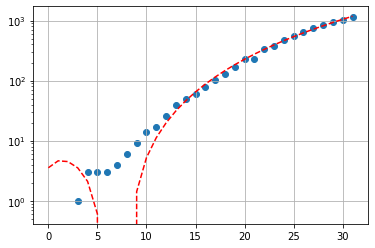

In [85]:
calculate_and_create_chart_for_region(START_DATE, 'Puglia')

## Bari

Total cases per 1000 inhabitants up to today: 0.3071
Total cases up to today: 387
New cases registered today: 51
New cases registered today in %: 15.18
Doubling time in the last five days: 5.0
Doubling time yesterday: 4.9
Trend of new cases (in %) in the last 5 days: 99.48


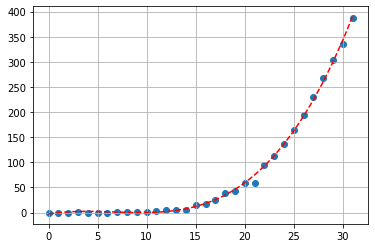

In [86]:
calculate_and_create_chart_for_province(START_DATE, 'Bari')

## 	Barletta-Andria-Trani

Total cases per 1000 inhabitants up to today: 0.2165
Total cases up to today: 85
New cases registered today: 20
New cases registered today in %: 30.77
Doubling time in the last five days: 3.5
Doubling time yesterday: 4.5
Trend of new cases (in %) in the last 5 days: 165.62


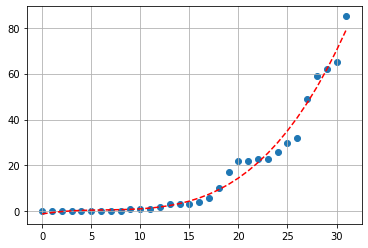

In [87]:
calculate_and_create_chart_for_province(START_DATE, 'Barletta-Andria-Trani')

## Brindisi

Total cases per 1000 inhabitants up to today: 0.3072
Total cases up to today: 122
New cases registered today: 6
New cases registered today in %: 5.17
Doubling time in the last five days: 13.3
Doubling time yesterday: 10.7
Trend of new cases (in %) in the last 5 days: 29.79


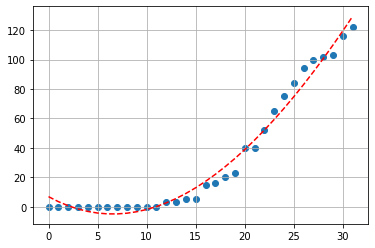

In [88]:
calculate_and_create_chart_for_province(START_DATE, 'Brindisi')

## Foggia

Total cases per 1000 inhabitants up to today: 0.4852
Total cases up to today: 305
New cases registered today: 28
New cases registered today in %: 10.11
Doubling time in the last five days: 7.3
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 60.53


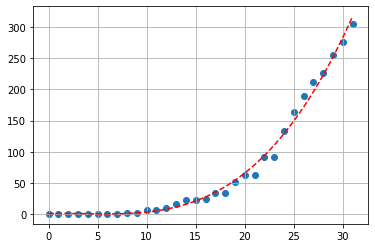

In [89]:
calculate_and_create_chart_for_province(START_DATE, 'Foggia')

## Lecce

Total cases per 1000 inhabitants up to today: 0.2207
Total cases up to today: 177
New cases registered today: 13
New cases registered today in %: 7.93
Doubling time in the last five days: 6.4
Doubling time yesterday: 5.6
Trend of new cases (in %) in the last 5 days: 71.84


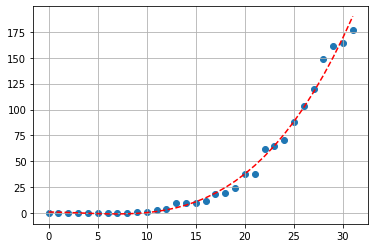

In [90]:
calculate_and_create_chart_for_province(START_DATE, 'Lecce')

## Taranto

Total cases per 1000 inhabitants up to today: 0.1268
Total cases up to today: 74
New cases registered today: 18
New cases registered today in %: 32.14
Doubling time in the last five days: 4.6
Doubling time yesterday: 6.6
Trend of new cases (in %) in the last 5 days: 111.43


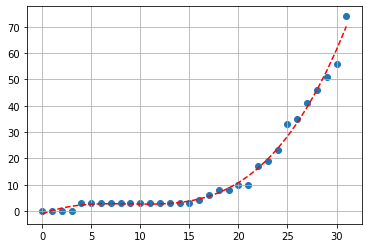

In [91]:
calculate_and_create_chart_for_province(START_DATE, 'Taranto')

# Casi di COVID-19 in Sardegna - COVID-19 cases in Sardinia

Total cases up to today: 494
New cases registered today: 52
New cases registered today in %: 11.76
Doubling time in the last five days: 8.6
Doubling time yesterday: 8.4
Trend of new cases (in %) in the last 5 days: 49.7


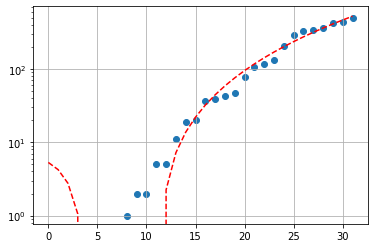

In [92]:
calculate_and_create_chart_for_region(START_DATE, 'Sardegna')

## Cagliari

Total cases per 1000 inhabitants up to today: 0.1481
Total cases up to today: 83
New cases registered today: 9
New cases registered today in %: 12.16
Doubling time in the last five days: 5.7
Doubling time yesterday: 6.4
Trend of new cases (in %) in the last 5 days: 84.44


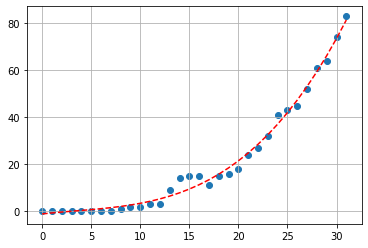

In [93]:
calculate_and_create_chart_for_province(START_DATE, 'Cagliari')

## Nuoro

Total cases per 1000 inhabitants up to today: 0.3331
Total cases up to today: 52
New cases registered today: 26
New cases registered today in %: 100.0
Doubling time in the last five days: 4.0
Doubling time yesterday: 20.7
Trend of new cases (in %) in the last 5 days: 136.36


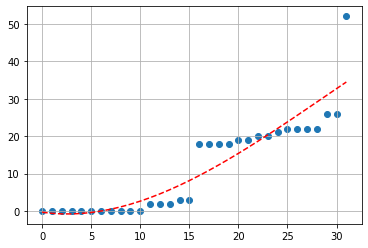

In [94]:
calculate_and_create_chart_for_province(START_DATE, 'Nuoro')

## Oristano

Total cases per 1000 inhabitants up to today: 0.0435
Total cases up to today: 7
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 6.2
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 75.0


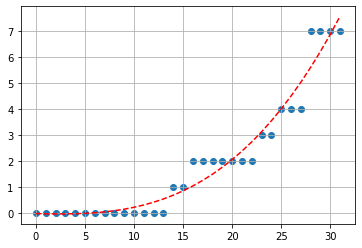

In [95]:
calculate_and_create_chart_for_province(START_DATE, 'Oristano')

## Sassari

Total cases per 1000 inhabitants up to today: 0.9936
Total cases up to today: 331
New cases registered today: 13
New cases registered today in %: 4.09
Doubling time in the last five days: 12.5
Doubling time yesterday: 9.0
Trend of new cases (in %) in the last 5 days: 31.87


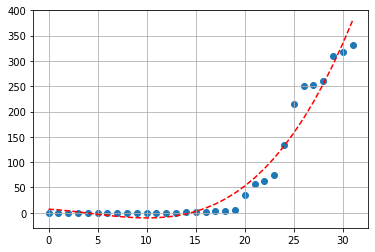

In [96]:
calculate_and_create_chart_for_province(START_DATE, 'Sassari')

# Casi di COVID-19 in Sicilia - COVID-19 cases in Sicily

Total cases up to today: 1164
New cases registered today: 170
New cases registered today in %: 17.1
Doubling time in the last five days: 4.0
Doubling time yesterday: 3.9
Trend of new cases (in %) in the last 5 days: 137.55


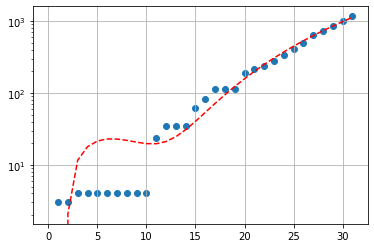

In [97]:
calculate_and_create_chart_for_region(START_DATE, 'Sicilia')

## Agrigento

Total cases per 1000 inhabitants up to today: 0.1244
Total cases up to today: 55
New cases registered today: 5
New cases registered today in %: 10.0
Doubling time in the last five days: 8.2
Doubling time yesterday: 7.2
Trend of new cases (in %) in the last 5 days: 52.78


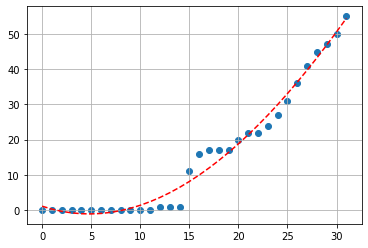

In [98]:
calculate_and_create_chart_for_province(START_DATE, 'Agrigento')

## Caltanissetta

Total cases per 1000 inhabitants up to today: 0.1854
Total cases up to today: 50
New cases registered today: 5
New cases registered today in %: 11.11
Doubling time in the last five days: 5.6
Doubling time yesterday: 3.8
Trend of new cases (in %) in the last 5 days: 85.19


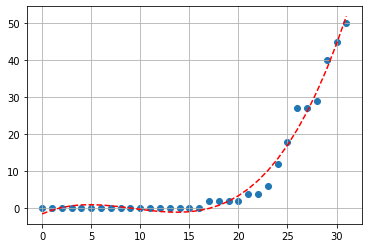

In [99]:
calculate_and_create_chart_for_province(START_DATE, 'Caltanissetta')

## Catania

Total cases per 1000 inhabitants up to today: 0.3108
Total cases up to today: 346
New cases registered today: 38
New cases registered today in %: 12.34
Doubling time in the last five days: 5.7
Doubling time yesterday: 5.4
Trend of new cases (in %) in the last 5 days: 83.07


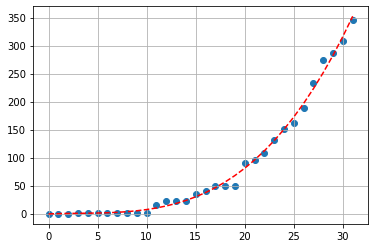

In [100]:
calculate_and_create_chart_for_province(START_DATE, 'Catania')

## Enna

Total cases per 1000 inhabitants up to today: 0.7914
Total cases up to today: 133
New cases registered today: 43
New cases registered today in %: 47.78
Doubling time in the last five days: 2.2
Doubling time yesterday: 2.7
Trend of new cases (in %) in the last 5 days: 392.59


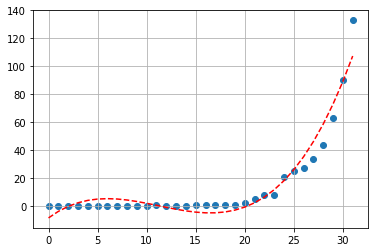

In [101]:
calculate_and_create_chart_for_province(START_DATE, 'Enna')

## Messina

Total cases per 1000 inhabitants up to today: 0.3471
Total cases up to today: 221
New cases registered today: 47
New cases registered today in %: 27.01
Doubling time in the last five days: 3.0
Doubling time yesterday: 2.3
Trend of new cases (in %) in the last 5 days: 215.71


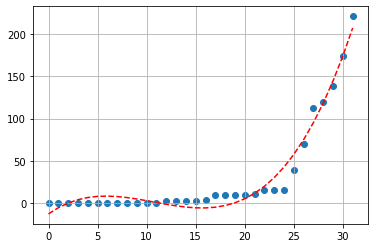

In [102]:
calculate_and_create_chart_for_province(START_DATE, 'Messina')

## Palermo

Total cases per 1000 inhabitants up to today: 0.1616
Total cases up to today: 205
New cases registered today: 12
New cases registered today in %: 6.22
Doubling time in the last five days: 2.9
Doubling time yesterday: 2.9
Trend of new cases (in %) in the last 5 days: 225.4


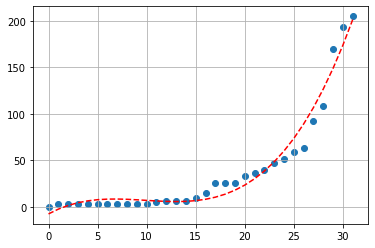

In [103]:
calculate_and_create_chart_for_province(START_DATE, 'Palermo')

## Ragusa

Total cases per 1000 inhabitants up to today: 0.0871
Total cases up to today: 28
New cases registered today: 6
New cases registered today in %: 27.27
Doubling time in the last five days: 2.8
Doubling time yesterday: 3.0
Trend of new cases (in %) in the last 5 days: 250.0


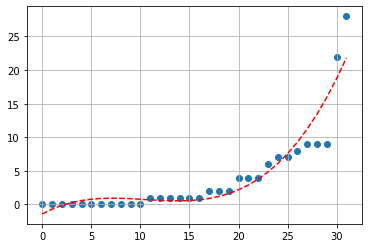

In [104]:
calculate_and_create_chart_for_province(START_DATE, 'Ragusa')

## Siracusa

Total cases per 1000 inhabitants up to today: 0.1912
Total cases up to today: 77
New cases registered today: 13
New cases registered today in %: 20.31
Doubling time in the last five days: 5.9
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 79.07


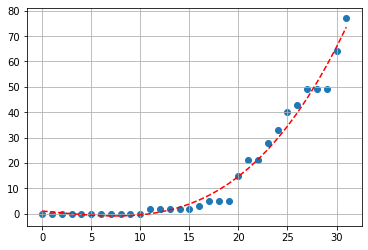

In [105]:
calculate_and_create_chart_for_province(START_DATE, 'Siracusa')

## Trapani

Total cases per 1000 inhabitants up to today: 0.1128
Total cases up to today: 49
New cases registered today: 1
New cases registered today in %: 2.08
Doubling time in the last five days: 5.8
Doubling time yesterday: 6.0
Trend of new cases (in %) in the last 5 days: 81.48


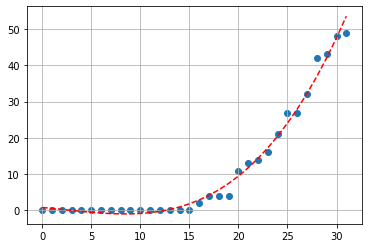

In [106]:
calculate_and_create_chart_for_province(START_DATE, 'Trapani')

# Casi di COVID-19 in Toscana - COVID-19 cases in Tuscany

Total cases up to today: 3225
New cases registered today: 253
New cases registered today in %: 8.51
Doubling time in the last five days: 7.3
Doubling time yesterday: 6.9
Trend of new cases (in %) in the last 5 days: 60.29


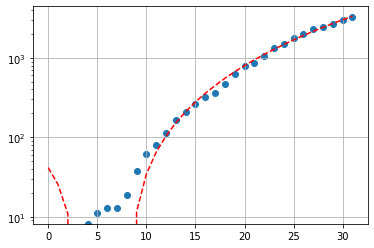

In [107]:
calculate_and_create_chart_for_region(START_DATE, 'Toscana')

## Arezzo

Total cases per 1000 inhabitants up to today: 0.7231
Total cases up to today: 249
New cases registered today: 20
New cases registered today in %: 8.73
Doubling time in the last five days: 5.7
Doubling time yesterday: 5.6
Trend of new cases (in %) in the last 5 days: 83.09


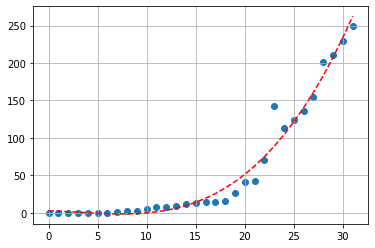

In [108]:
calculate_and_create_chart_for_province(START_DATE, 'Arezzo')

## Firenze

Total cases per 1000 inhabitants up to today: 0.7531
Total cases up to today: 764
New cases registered today: 55
New cases registered today in %: 7.76
Doubling time in the last five days: 6.6
Doubling time yesterday: 6.1
Trend of new cases (in %) in the last 5 days: 69.4


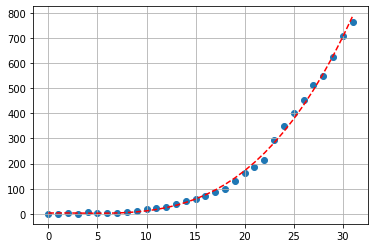

In [109]:
calculate_and_create_chart_for_province(START_DATE, 'Firenze')

## Grosseto

Total cases per 1000 inhabitants up to today: 0.7801
Total cases up to today: 174
New cases registered today: 27
New cases registered today in %: 18.37
Doubling time in the last five days: 7.0
Doubling time yesterday: 8.3
Trend of new cases (in %) in the last 5 days: 64.15


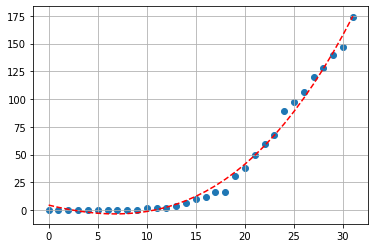

In [110]:
calculate_and_create_chart_for_province(START_DATE, 'Grosseto')

## Livorno

Total cases per 1000 inhabitants up to today: 0.6047
Total cases up to today: 204
New cases registered today: 25
New cases registered today in %: 13.97
Doubling time in the last five days: 6.5
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 70.0


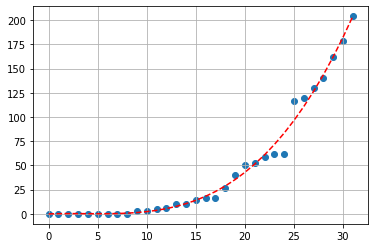

In [111]:
calculate_and_create_chart_for_province(START_DATE, 'Livorno')

## Lucca

Total cases per 1000 inhabitants up to today: 1.2332
Total cases up to today: 481
New cases registered today: 45
New cases registered today in %: 10.32
Doubling time in the last five days: 7.7
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 56.68


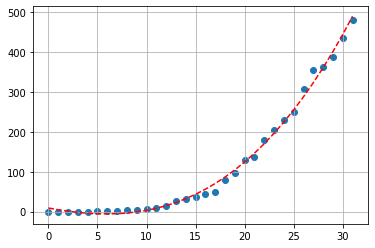

In [112]:
calculate_and_create_chart_for_province(START_DATE, 'Lucca')

## Massa Carrara

Total cases per 1000 inhabitants up to today: 1.6991
Total cases up to today: 334
New cases registered today: 4
New cases registered today in %: 1.21
Doubling time in the last five days: 13.0
Doubling time yesterday: 9.8
Trend of new cases (in %) in the last 5 days: 30.47


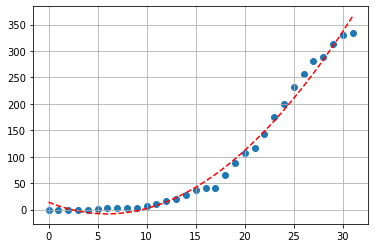

In [113]:
calculate_and_create_chart_for_province(START_DATE, 'Massa Carrara')

## Pisa

Total cases per 1000 inhabitants up to today: 0.8297
Total cases up to today: 350
New cases registered today: 33
New cases registered today in %: 10.41
Doubling time in the last five days: 6.8
Doubling time yesterday: 6.1
Trend of new cases (in %) in the last 5 days: 65.88


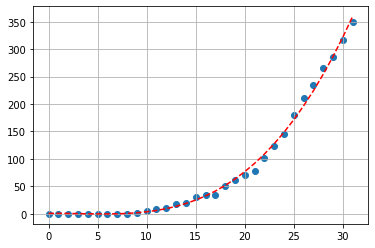

In [114]:
calculate_and_create_chart_for_province(START_DATE, 'Pisa')

## Pistoia

Total cases per 1000 inhabitants up to today: 0.9046
Total cases up to today: 264
New cases registered today: 10
New cases registered today in %: 3.94
Doubling time in the last five days: 9.2
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 45.86


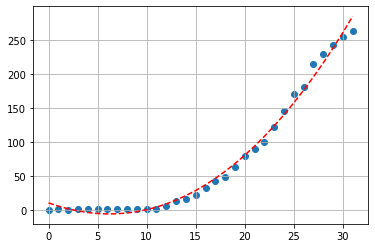

In [115]:
calculate_and_create_chart_for_province(START_DATE, 'Pistoia')

## Prato

Total cases per 1000 inhabitants up to today: 0.7423
Total cases up to today: 189
New cases registered today: 11
New cases registered today in %: 6.18
Doubling time in the last five days: 6.5
Doubling time yesterday: 5.4
Trend of new cases (in %) in the last 5 days: 70.27


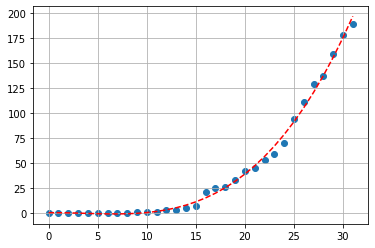

In [116]:
calculate_and_create_chart_for_province(START_DATE, 'Prato')

## Siena

Total cases per 1000 inhabitants up to today: 0.8049
Total cases up to today: 216
New cases registered today: 23
New cases registered today in %: 11.92
Doubling time in the last five days: 7.1
Doubling time yesterday: 8.4
Trend of new cases (in %) in the last 5 days: 62.41


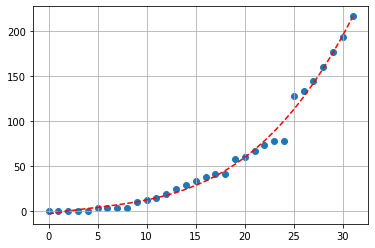

In [117]:
calculate_and_create_chart_for_province(START_DATE, 'Siena')

# Casi di COVID-19 in Provincia Autonoma di Trento - COVID-19 cases in the Autonomous Province of Trento

Total cases per 1000 inhabitants up to today: 2.4081
Total cases up to today: 1297
New cases registered today: 75
New cases registered today in %: 6.14
Doubling time in the last five days: 6.8
Doubling time yesterday: 5.4
Trend of new cases (in %) in the last 5 days: 65.86


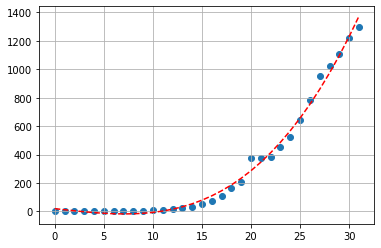

In [118]:
calculate_and_create_chart_for_province(START_DATE, 'Trento')

# Casi di COVID-19 in Umbria - COVID-19 cases in Umbria

Total cases up to today: 778
New cases registered today: 92
New cases registered today in %: 13.41
Doubling time in the last five days: 6.2
Doubling time yesterday: 5.8
Trend of new cases (in %) in the last 5 days: 75.23


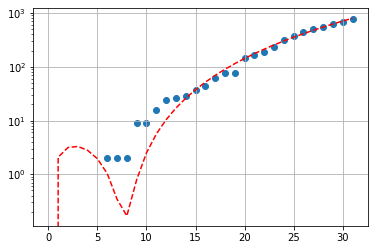

In [119]:
calculate_and_create_chart_for_region(START_DATE, 'Umbria')

## Perugia

Total cases per 1000 inhabitants up to today: 0.9081
Total cases up to today: 600
New cases registered today: 77
New cases registered today in %: 14.72
Doubling time in the last five days: 5.8
Doubling time yesterday: 5.5
Trend of new cases (in %) in the last 5 days: 82.37


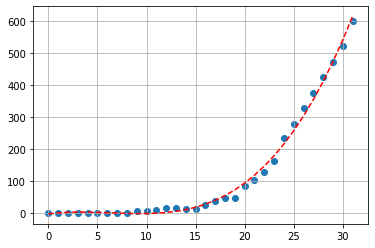

In [120]:
calculate_and_create_chart_for_province(START_DATE, 'Perugia')

## Terni

Total cases per 1000 inhabitants up to today: 0.78
Total cases up to today: 178
New cases registered today: 15
New cases registered today in %: 9.2
Doubling time in the last five days: 7.9
Doubling time yesterday: 6.7
Trend of new cases (in %) in the last 5 days: 54.78


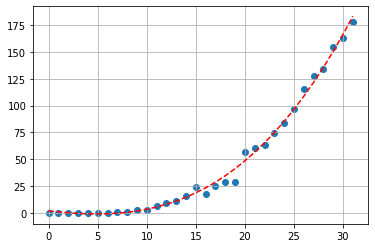

In [121]:
calculate_and_create_chart_for_province(START_DATE, 'Terni')

# Casi di COVID-19 in Valle d'Aosta - COVID-19 cases in Aosta Valley

Total cases per 1000 inhabitants up to today: 3.2156
Total cases up to today: 408
New cases registered today: 7
New cases registered today in %: 1.75
Doubling time in the last five days: 13.1
Doubling time yesterday: 8.3
Trend of new cases (in %) in the last 5 days: 30.35


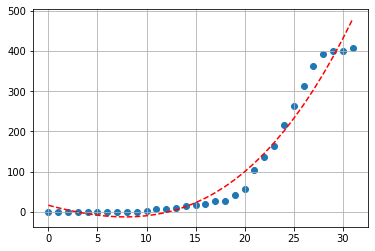

In [122]:
calculate_and_create_chart_for_province(START_DATE, "Aosta")

# Casi di COVID-19 in Veneto - COVID-19 cases in Veneto

Total cases up to today: 6675
New cases registered today: 475
New cases registered today in %: 7.66
Doubling time in the last five days: 8.5
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 50.58


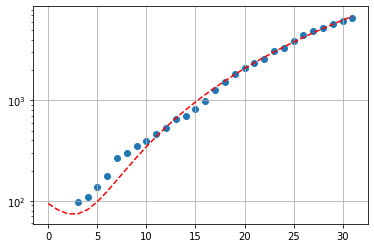

In [123]:
calculate_and_create_chart_for_region(START_DATE, 'Veneto')

## Belluno

Total cases per 1000 inhabitants up to today: 1.521
Total cases up to today: 313
New cases registered today: 15
New cases registered today in %: 5.03
Doubling time in the last five days: 8.9
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 47.64


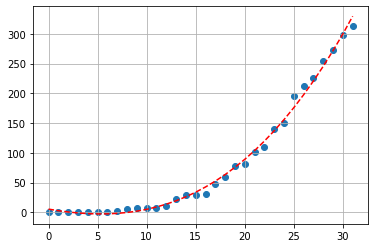

In [124]:
calculate_and_create_chart_for_province(START_DATE, 'Belluno')

## Padova

Total cases per 1000 inhabitants up to today: 1.8979
Total cases up to today: 1777
New cases registered today: 141
New cases registered today in %: 8.62
Doubling time in the last five days: 8.0
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 53.85


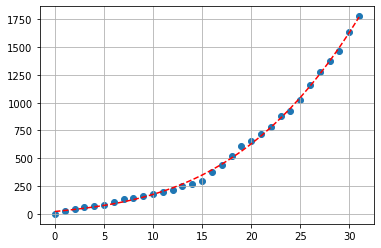

In [125]:
calculate_and_create_chart_for_province(START_DATE, 'Padova')

## Rovigo

Total cases per 1000 inhabitants up to today: 0.461
Total cases up to today: 110
New cases registered today: 23
New cases registered today in %: 26.44
Doubling time in the last five days: 7.2
Doubling time yesterday: 13.3
Trend of new cases (in %) in the last 5 days: 61.76


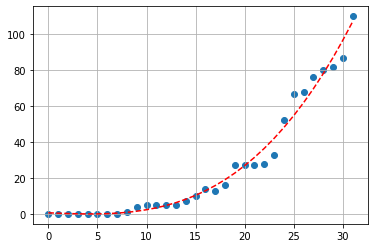

In [126]:
calculate_and_create_chart_for_province(START_DATE, 'Rovigo')

## Treviso

Total cases per 1000 inhabitants up to today: 1.4154
Total cases up to today: 1254
New cases registered today: 77
New cases registered today in %: 6.54
Doubling time in the last five days: 7.8
Doubling time yesterday: 7.0
Trend of new cases (in %) in the last 5 days: 55.58


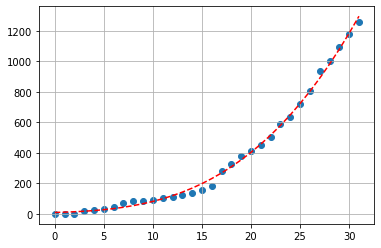

In [127]:
calculate_and_create_chart_for_province(START_DATE, 'Treviso')

## Venezia

Total cases per 1000 inhabitants up to today: 1.0769
Total cases up to today: 920
New cases registered today: 46
New cases registered today in %: 5.26
Doubling time in the last five days: 10.7
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 38.14


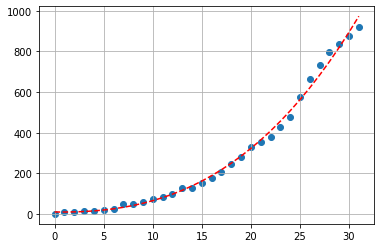

In [128]:
calculate_and_create_chart_for_province(START_DATE, 'Venezia')

## Verona

Total cases per 1000 inhabitants up to today: 1.5213
Total cases up to today: 1402
New cases registered today: 98
New cases registered today in %: 7.52
Doubling time in the last five days: 9.0
Doubling time yesterday: 6.8
Trend of new cases (in %) in the last 5 days: 46.96


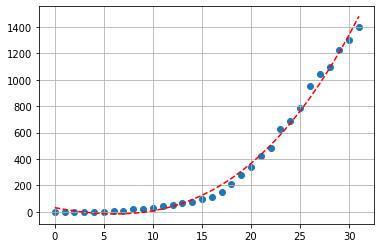

In [129]:
calculate_and_create_chart_for_province(START_DATE, 'Verona')

## Vicenza

Total cases per 1000 inhabitants up to today: 1.0392
Total cases up to today: 899
New cases registered today: 75
New cases registered today in %: 9.1
Doubling time in the last five days: 7.7
Doubling time yesterday: 7.5
Trend of new cases (in %) in the last 5 days: 57.17


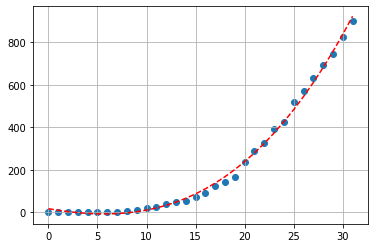

In [130]:
calculate_and_create_chart_for_province(START_DATE, 'Vicenza')